In [1]:
import pandas as pd

In [2]:
import datetime
from datetime import time as dt

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import gc
gc.collect()

7

In [6]:
#mydatapath="yellow_tripdata_2018-01.csv"
#this function to read month's data
def data_aggregator(path,columnnumber,chunksize):
    df_list = []
    for chunk in pd.read_csv(path,usecols=columnnumber, chunksize=chunksize):
        df_list.append(pd.DataFrame(chunk).dropna())
    result = pd.concat(df_list)
    del df_list
    return result
"""df1=data_aggregator(mydatapath,[7],100)
df1['PULocationID']=df1['PULocationID'].apply(int)"""

"df1=data_aggregator(mydatapath,[7],100)\ndf1['PULocationID']=df1['PULocationID'].apply(int)"

In [8]:
import requests
from bs4 import BeautifulSoup
page = requests.get("https://github.com/CriMenghini/ADM-2018/blob/master/Homework_2/taxi_zone_lookup.csv")
soup = BeautifulSoup(page.content, 'html.parser')
ids=[]
bor=[]
zon=[]
srv_zon=[]
cell=0
for i in range(2,1327,5):    #FIRSTLY We get all the location ids
    a=soup.find_all('td')[i].get_text()  
    ids.append(a)
    cell=cell+1
    
cell=0
for i in range(3,1328,5):    #Then all the boroughs
    a=soup.find_all('td')[i].get_text()
    bor.append(a)
    cell=cell+1
    
cell=0
for i in range(4,1329,5):   #After that we get al zones
    a=soup.find_all('td')[i].get_text()
    zon.append(a)
    cell=cell+1
cell=0
for i in range(5,1330,5):    #Finally we get all the seving zones
    a=soup.find_all('td')[i].get_text()
    srv_zon.append(a)
    cell=cell+1
# after getting all the informations needed we merged all the lists together
data_tuples = list(zip(ids,bor,zon,srv_zon))

In [9]:
boroghFrame=pd.DataFrame(data_tuples,columns = ["PULocationID", "Borogh", "Zone", "srv_zon"])
boroghFrame['PULocationID']=boroghFrame['PULocationID'].apply(int)
#boroghFrame=boroghFrame[boroghFrame.Borogh !='Unknown']
#boroghFrame=boroghFrame[boroghFrame.Borogh !='EWR']
#this function to merge(join) two dataframes one of them the month's dataframe and second the borogh dataframe
def data_aggregator2(df1,df2,oncolumns,jointype):
    result = pd.merge(df1, boroghFrame, on=oncolumns,how=jointype)
    return result
#data_aggregator(df1,boroghFrame,['PULocationID'],"inner")

In [10]:
data_tuples=None
del data_tuples
ids=None
del ids
bor=None
del bor
zon=None
del zon
srv_zon=None
del srv_zon

In [11]:
gc.collect()

21

In [12]:
JanData="yellow_tripdata_2018-01.csv"
FebData="yellow_tripdata_2018-02.csv"
MarData="yellow_tripdata_2018-03.csv"
AprData="yellow_tripdata_2018-04.csv"
MayData="yellow_tripdata_2018-05.csv"
JunData="yellow_tripdata_2018-06.csv"

In [12]:
#RQ3 All NYC, Here firstly we import the data of each month, we choose two columns, Pickup Datetime and Dropoff Datetime,
#we subscript them to get the duration of each trip, then we plot the distribution of the trips.
#MAY
MayDF=data_aggregator(MayData,[1,2],10000)
MayDF['tpep_pickup_datetime']=pd.to_datetime(MayDF['tpep_pickup_datetime'])
MayDF['tpep_dropoff_datetime']=pd.to_datetime(MayDF['tpep_dropoff_datetime'])
MayDuration=pd.DataFrame(columns=['Duration'])
MayDuration['Duration']=(MayDF['tpep_dropoff_datetime']-MayDF['tpep_pickup_datetime']).dt.seconds/60
MayDF=None
del MayDF
gc.collect()
MayDuration=MayDuration[MayDuration.Duration>1.0]

In [13]:
#JUN
JunDF=data_aggregator(JunData,[1,2],10000)
JunDF['tpep_pickup_datetime']=pd.to_datetime(JunDF['tpep_pickup_datetime'])
JunDF['tpep_dropoff_datetime']=pd.to_datetime(JunDF['tpep_dropoff_datetime'])
JunDuration=pd.DataFrame(columns=['Duration'])
JunDuration['Duration']=(JunDF['tpep_dropoff_datetime']-JunDF['tpep_pickup_datetime']).dt.seconds/60
JunDF=None
del JunDF
gc.collect()
JunDuration=JunDuration[JunDuration.Duration>1.0]

In [14]:
#Apr
AprDF=data_aggregator(AprData,[1,2],10000)
AprDF['tpep_pickup_datetime']=pd.to_datetime(AprDF['tpep_pickup_datetime'])
AprDF['tpep_dropoff_datetime']=pd.to_datetime(AprDF['tpep_dropoff_datetime'])
AprDuration=pd.DataFrame(columns=['Duration'])
AprDuration['Duration']=(AprDF['tpep_dropoff_datetime']-AprDF['tpep_pickup_datetime']).dt.seconds/60
AprDF=None
del AprDF
gc.collect()
AprDuration=AprDuration[AprDuration.Duration>1.0]

In [15]:
#Mar
MarDF=data_aggregator(MarData,[1,2],10000)
MarDF['tpep_pickup_datetime']=pd.to_datetime(MarDF['tpep_pickup_datetime'])
MarDF['tpep_dropoff_datetime']=pd.to_datetime(MarDF['tpep_dropoff_datetime'])
MarDuration=pd.DataFrame(columns=['Duration'])
MarDuration['Duration']=(MarDF['tpep_dropoff_datetime']-MarDF['tpep_pickup_datetime']).dt.seconds/60
MarDF=None
del MarDF
gc.collect()
MarDuration=MarDuration[MarDuration.Duration>1.0]

In [16]:
#Feb
FebDF=data_aggregator(FebData,[1,2],10000)
FebDF['tpep_pickup_datetime']=pd.to_datetime(FebDF['tpep_pickup_datetime'])
FebDF['tpep_dropoff_datetime']=pd.to_datetime(FebDF['tpep_dropoff_datetime'])
FebDuration=pd.DataFrame(columns=['Duration'])
FebDuration['Duration']=(FebDF['tpep_dropoff_datetime']-FebDF['tpep_pickup_datetime']).dt.seconds/60
FebDF=None
del FebDF
gc.collect()
FebDuration=FebDuration[FebDuration.Duration>1.0]

In [17]:
#Jan
JanDF=data_aggregator(JanData,[1,2],10000)
JanDF['tpep_pickup_datetime']=pd.to_datetime(JanDF['tpep_pickup_datetime'])
JanDF['tpep_dropoff_datetime']=pd.to_datetime(JanDF['tpep_dropoff_datetime'])
JanDuration=pd.DataFrame(columns=['Duration'])
JanDuration['Duration']=(JanDF['tpep_dropoff_datetime']-JanDF['tpep_pickup_datetime']).dt.seconds/60
JanDF=None
del JanDF
gc.collect()
JanDuration=JanDuration[JanDuration.Duration>1.0]

In [24]:
FullData=pd.concat([JanDuration,FebDuration,MarDuration,AprDuration,MayDuration,JunDuration])

C:\Users\Giumas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


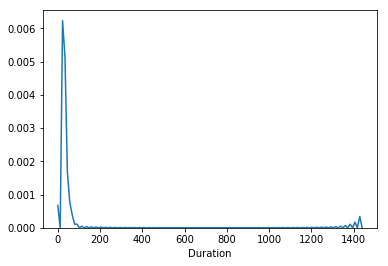

In [25]:
sns.distplot(FullData['Duration'], hist=False);

In [26]:
FullData=FullData[FullData.Duration < 650]

C:\Users\Giumas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


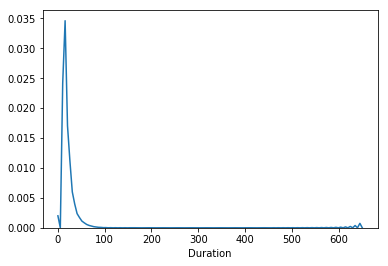

In [27]:
sns.distplot(FullData['Duration'], hist=False);

From the previous plot we find that the distribution of the trips duration is the chi square distirbution.

In [13]:
#RQ3 Borough Case
MayDF=data_aggregator(MayData,[1,2,7],10000)

In [14]:
MayBoroghData=data_aggregator2(MayDF,boroghFrame,['PULocationID'],"inner")

In [15]:
MayDF=None
del MayDF
gc.collect()

21

In [16]:
MayBoroghDF=pd.DataFrame(columns=['pickup','dropoff','borogh'])

In [17]:
MayBoroghDF['pickup']=pd.to_datetime(MayBoroghData['tpep_pickup_datetime'])
MayBoroghDF['dropoff']=pd.to_datetime(MayBoroghData['tpep_dropoff_datetime'])

In [18]:
MayBoroghDF['borogh']=MayBoroghData['Borogh']

In [19]:
MayBoroghData=None
del MayBoroghData

In [20]:
MayDuration=pd.DataFrame(columns=['Duration','Borogh'])

In [21]:
MayDuration['Duration']=(MayBoroghDF['dropoff']-MayBoroghDF['pickup']).dt.seconds/60

In [22]:
MayDuration['Borogh']=MayBoroghDF['borogh']

In [23]:
MayBoroghDF=None
del MayBoroghDF

In [24]:
MayDuration=MayDuration[MayDuration.Duration>1.0]

In [25]:
MayDuration=MayDuration[MayDuration.Duration<650.0]

In [26]:
gc.collect()

46

In [27]:
#RQ3 June
JunDF=data_aggregator(JunData,[1,2,7],10000)
JunBoroghData=data_aggregator2(JunDF,boroghFrame,['PULocationID'],"inner")
JunDF=None
del JunDF
gc.collect()

JunBoroghDF=pd.DataFrame(columns=['pickup','dropoff','borogh'])
JunBoroghDF['pickup']=pd.to_datetime(JunBoroghData['tpep_pickup_datetime'])
JunBoroghDF['dropoff']=pd.to_datetime(JunBoroghData['tpep_dropoff_datetime'])
JunBoroghDF['borogh']=JunBoroghData['Borogh']
JunBoroghData=None
del JunBoroghData

JunDuration=pd.DataFrame(columns=['Duration','Borogh'])
JunDuration['Duration']=(JunBoroghDF['dropoff']-JunBoroghDF['pickup']).dt.seconds/60
JunDuration['Borogh']=JunBoroghDF['borogh']
JunBoroghDF=None
del JunBoroghDF

JunDuration=JunDuration[JunDuration.Duration>1.0]
JunDuration=JunDuration[JunDuration.Duration<650.0]

In [28]:
#RQ3 Apr
AprDF=data_aggregator(AprData,[1,2,7],10000)
AprBoroghData=data_aggregator2(AprDF,boroghFrame,['PULocationID'],"inner")
AprDF=None
del AprDF
gc.collect()

AprBoroghDF=pd.DataFrame(columns=['pickup','dropoff','borogh'])
AprBoroghDF['pickup']=pd.to_datetime(AprBoroghData['tpep_pickup_datetime'])
AprBoroghDF['dropoff']=pd.to_datetime(AprBoroghData['tpep_dropoff_datetime'])
AprBoroghDF['borogh']=AprBoroghData['Borogh']
AprBoroghData=None
del AprBoroghData

AprDuration=pd.DataFrame(columns=['Duration','Borogh'])
AprDuration['Duration']=(AprBoroghDF['dropoff']-AprBoroghDF['pickup']).dt.seconds/60
AprDuration['Borogh']=AprBoroghDF['borogh']
AprBoroghDF=None
del AprBoroghDF

AprDuration=AprDuration[AprDuration.Duration>1.0]
AprDuration=AprDuration[AprDuration.Duration<650.0]

In [29]:
#RQ3 Mar
MarDF=data_aggregator(MarData,[1,2,7],10000)
MarBoroghData=data_aggregator2(MarDF,boroghFrame,['PULocationID'],"inner")
MarDF=None
del MarDF
gc.collect()

MarBoroghDF=pd.DataFrame(columns=['pickup','dropoff','borogh'])
MarBoroghDF['pickup']=pd.to_datetime(MarBoroghData['tpep_pickup_datetime'])
MarBoroghDF['dropoff']=pd.to_datetime(MarBoroghData['tpep_dropoff_datetime'])
MarBoroghDF['borogh']=MarBoroghData['Borogh']
MarBoroghData=None
del MarBoroghData

MarDuration=pd.DataFrame(columns=['Duration','Borogh'])
MarDuration['Duration']=(MarBoroghDF['dropoff']-MarBoroghDF['pickup']).dt.seconds/60
MarDuration['Borogh']=MarBoroghDF['borogh']
MarBoroghDF=None
del MarBoroghDF

MarDuration=MarDuration[MarDuration.Duration>1.0]
MarDuration=MarDuration[MarDuration.Duration<650.0]

In [30]:
#RQ3 Feb
FebDF=data_aggregator(FebData,[1,2,7],10000)
FebBoroghData=data_aggregator2(FebDF,boroghFrame,['PULocationID'],"inner")
FebDF=None
del FebDF
gc.collect()

FebBoroghDF=pd.DataFrame(columns=['pickup','dropoff','borogh'])
FebBoroghDF['pickup']=pd.to_datetime(FebBoroghData['tpep_pickup_datetime'])
FebBoroghDF['dropoff']=pd.to_datetime(FebBoroghData['tpep_dropoff_datetime'])
FebBoroghDF['borogh']=FebBoroghData['Borogh']
FebBoroghData=None
del FebBoroghData

FebDuration=pd.DataFrame(columns=['Duration','Borogh'])
FebDuration['Duration']=(FebBoroghDF['dropoff']-FebBoroghDF['pickup']).dt.seconds/60
FebDuration['Borogh']=FebBoroghDF['borogh']
FebBoroghDF=None
del FebBoroghDF
FebDuration=FebDuration[FebDuration.Duration>1.0]
FebDuration=FebDuration[FebDuration.Duration<650.0]

In [31]:
#RQ3 Jan
JanDF=data_aggregator(JanData,[1,2,7],10000)
JanBoroghData=data_aggregator2(JanDF,boroghFrame,['PULocationID'],"inner")
JanDF=None
del JanDF
gc.collect()

JanBoroghDF=pd.DataFrame(columns=['pickup','dropoff','borogh'])
JanBoroghDF['pickup']=pd.to_datetime(JanBoroghData['tpep_pickup_datetime'])
JanBoroghDF['dropoff']=pd.to_datetime(JanBoroghData['tpep_dropoff_datetime'])
JanBoroghDF['borogh']=JanBoroghData['Borogh']
JanBoroghData=None
del JanBoroghData

JanDuration=pd.DataFrame(columns=['Duration','Borogh'])
JanDuration['Duration']=(JanBoroghDF['dropoff']-JanBoroghDF['pickup']).dt.seconds/60
JanDuration['Borogh']=JanBoroghDF['borogh']
JanBoroghDF=None
del JanBoroghDF

JanDuration=JanDuration[JanDuration.Duration>1.0]
JanDuration=JanDuration[JanDuration.Duration<650.0]

In [39]:
Duration=pd.concat([JanDuration,FebDuration,MarDuration,AprDuration,MayDuration,JunDuration])

C:\Users\Giumas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


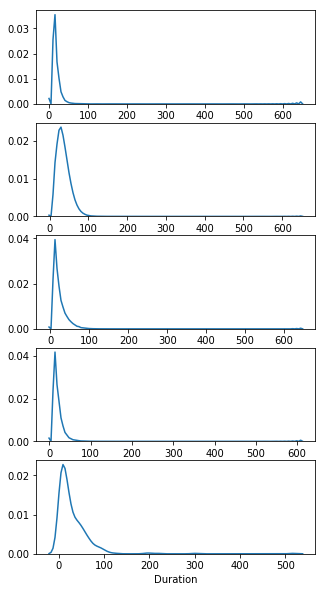

In [40]:
f, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5,figsize=(5, 10))
m=Duration.loc[Duration['Borogh']=='Manhattan']
sns.distplot(m['Duration'], hist=False,ax=ax1);
m=Duration.loc[Duration['Borogh']=='Queens']
sns.distplot(m['Duration'], hist=False,ax=ax2);
m=Duration.loc[Duration['Borogh']=='Bronx']
sns.distplot(m['Duration'], hist=False,ax=ax3);
m=Duration.loc[Duration['Borogh']=='Brooklyn']
sns.distplot(m['Duration'], hist=False,ax=ax4);
m=Duration.loc[Duration['Borogh']=='Staten Island']
sns.distplot(m['Duration'], hist=False,ax=ax5);

In [ ]:
From the previous plots we find that the distribution of the trips duration is the chi square distirbution.